# IMPORTING LIBRARIES

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [187]:
#Loading dataset
ds=pd.read_csv('heartdisease_data.csv')

In [188]:
# Seeing data inside the dataset(top 5)
ds.head()

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


In [189]:
ds.shape

(199, 14)

The dataset contains 199 rows and 14 columns

In [190]:
ds.columns = ['Age','Sex','CP','Trestbps','Chol','FBS','Restecg','Thalach','Exang','Oldpeak',
              'Slope','CA','Thal','Target Attribute']

Defining column names as per description given in problem dataset

In [191]:
ds

,Age,Sex,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Target Attribute
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


Observations:

1) Dataset contains '?' which are missing values. Need to replace '?' with NaN then filling NaN with some meaningful data.
2) Few columns also contains '0' which are also missing values. Need of check and fill with mean/median of column.

In [192]:
# Replacing '?' with NaN values
ds.replace('?',np.NaN,inplace= True)

In [193]:
# Checking if the replacement done after replacement?
ds.head()

,Age,Sex,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Target Attribute
0,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
1,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
2,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
3,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,NaN,NaN,0


In [194]:
ds.isnull().sum()

Age                   0
Sex                   0
CP                    0
Trestbps             56
Chol                  7
FBS                   7
Restecg               0
Thalach              53
Exang                53
Oldpeak              56
Slope               102
CA                  197
Thal                165
Target Attribute      0
dtype: int64

Observations:

1) Columns Trestbps,Chol, FBS, Thalach,Exang,Oldpeak,Slope,CA,Thal has missing values.

# Checking NaN values in columns of dataset

In [195]:
ds['Chol'].unique()

array(['209', '218', '228', '213', '0', '236', '267', '166', '220', '177',
       '186', '100', '171', '230', '281', '203', '277', '233', '240',
       '153', '224', '316', '311', '270', '217', '214', '252', '339',
       '216', '276', '458', '241', '384', '297', '248', '308', '208',
       '227', '210', '245', '225', '198', '195', '161', '258', '235',
       '305', '223', '282', '349', nan, '160', '312', '283', '142', '211',
       '306', '222', '202', '197', '204', '274', '192', '298', '272',
       '200', '261', '181', '260', '221', '175', '219', '310', '232',
       '273', '182', '292', '289', '193', '170', '369', '173', '271',
       '244', '285', '243', '237', '165', '287', '256', '264', '226',
       '207', '284', '337', '254', '300', '333', '139', '385'],
      dtype=object)

In [196]:
# Checking unique instances in columns
ds['Chol'].value_counts()[0:5]

0      49
203     4
220     4
258     4
254     3
Name: Chol, dtype: int64

In [197]:
ds['Chol'].fillna('0',inplace=True)

In [198]:
ds['Chol'].value_counts()[0:5]

0      56
203     4
220     4
258     4
254     3
Name: Chol, dtype: int64

Oh! There are 56 instances with 0 Chol. level. cholestrol level can't be 0.Lets see what we can do with 0

In [199]:
ds['Chol'].astype(int).describe()

count    199.000000
mean     172.050251
std      116.880788
min        0.000000
25%        0.000000
50%      214.000000
75%      254.000000
max      458.000000
Name: Chol, dtype: float64

From Observations:
    
    1) Mean of the column 'Chol' is 172.05 and median is 214. We can replace 0 with the mean 172.

In [200]:
ds['Chol'] = ds['Chol'].replace('0', 172)

In [201]:
ds['Chol'].unique()

array(['209', '218', '228', '213', 172, '236', '267', '166', '220', '177',
       '186', '100', '171', '230', '281', '203', '277', '233', '240',
       '153', '224', '316', '311', '270', '217', '214', '252', '339',
       '216', '276', '458', '241', '384', '297', '248', '308', '208',
       '227', '210', '245', '225', '198', '195', '161', '258', '235',
       '305', '223', '282', '349', '160', '312', '283', '142', '211',
       '306', '222', '202', '197', '204', '274', '192', '298', '272',
       '200', '261', '181', '260', '221', '175', '219', '310', '232',
       '273', '182', '292', '289', '193', '170', '369', '173', '271',
       '244', '285', '243', '237', '165', '287', '256', '264', '226',
       '207', '284', '337', '254', '300', '333', '139', '385'],
      dtype=object)

In [202]:
ds['FBS'].unique()

array(['0', '1', nan], dtype=object)

In [203]:
ds['FBS'].value_counts()

0    124
1     68
Name: FBS, dtype: int64

In [204]:
ds['FBS'].fillna('0',inplace=True)

In [205]:
ds['FBS'].value_counts()

0    131
1     68
Name: FBS, dtype: int64

In [206]:
ds['Slope'].unique()

array([nan, '3', '1', '2'], dtype=object)

In [207]:
ds['Slope'].value_counts()

2    52
3    29
1    16
Name: Slope, dtype: int64

We can see that 2 has the maximum number of instances, so we can replace all NaN values with 2 in Slope column.

In [208]:
ds['Slope'].replace(np.NaN, '2',inplace=True)

In [209]:
ds['Slope'].value_counts()

2    154
3     29
1     16
Name: Slope, dtype: int64

In [210]:
ds['Trestbps'].unique()

array(['130', '132', '142', '110', '120', '150', '180', '160', '126',
       '140', nan, '128', '170', '152', '116', '124', '0', '122', '144',
       '154', '125', '104', '136', '134', '138', '178', '146', '135',
       '158', '106', '112', '102', '96', '172', '155', '156', '118',
       '100', '190', '114', '127'], dtype=object)

In [211]:
ds['Trestbps'].value_counts()[0:5]

120    16
130    15
110     9
150     9
140     9
Name: Trestbps, dtype: int64

We can see that 120 is the maximum number of instances, so we can replace all NaN values with 120 in Trestbps column.

In [212]:
ds['Trestbps'].replace(np.nan, '120',inplace=True)

In [213]:
ds['Trestbps'].unique()

array(['130', '132', '142', '110', '120', '150', '180', '160', '126',
       '140', '128', '170', '152', '116', '124', '0', '122', '144', '154',
       '125', '104', '136', '134', '138', '178', '146', '135', '158',
       '106', '112', '102', '96', '172', '155', '156', '118', '100',
       '190', '114', '127'], dtype=object)

Column 'Trestbps' also has 0 as an instance. Resting Blood Pressure cannot be 0. Lets replace 0 with some meaningful data.

In [214]:
ds['Trestbps'].astype(float).describe()

count    199.000000
mean     129.859296
std       19.315308
min        0.000000
25%      120.000000
50%      122.000000
75%      140.000000
max      190.000000
Name: Trestbps, dtype: float64

Lets fill 0 with the mean of data Mean = 130.

In [215]:
ds['Trestbps'].replace('0', 130,inplace=True)

In [216]:
ds['Trestbps'].unique()

array(['130', '132', '142', '110', '120', '150', '180', '160', '126',
       '140', '128', '170', '152', '116', '124', 130, '122', '144', '154',
       '125', '104', '136', '134', '138', '178', '146', '135', '158',
       '106', '112', '102', '96', '172', '155', '156', '118', '100',
       '190', '114', '127'], dtype=object)

In [217]:
ds['Thalach'].unique()

array(['127', '140', '149', '99', '120', '105', '141', '157', '117', nan,
       '148', '86', '84', '125', '118', '124', '106', '111', '180', '129',
       '110', '155', '122', '133', '131', '80', '165', '107', '128',
       '160', '97', '161', '130', '108', '123', '144', '102', '145', '69',
       '138', '112', '150', '88', '132', '121', '135', '100', '162', '73',
       '154', '115', '119', '159', '94', '113', '98', '96', '151', '126',
       '93'], dtype=object)

In [218]:
ds['Thalach'].value_counts()[0:5]

120    12
140    12
110     8
130     6
112     5
Name: Thalach, dtype: int64

We can see that 120 & 140  are equal with maximum number of instances, so we can replace all NaN values with 
120 in Trestbps column. We can select either of them

In [219]:
ds['Thalach'].replace(np.nan, '120',inplace=True)

In [220]:
ds['Thalach'].value_counts()[0:5]

120    65
140    12
110     8
130     6
112     5
Name: Thalach, dtype: int64

In [221]:
ds['Exang'].unique()

array(['0', '1', nan], dtype=object)

In [222]:
ds['Exang'].value_counts()

1    94
0    52
Name: Exang, dtype: int64

We can see that 1 is the maximum number of instances, so we can replace all NaN values with 1 in Exang Column.

In [223]:
ds['Exang'].replace(np.nan, '1',inplace=True)

In [224]:
ds['Exang'].value_counts()

1    147
0     52
Name: Exang, dtype: int64

In [225]:
ds['Oldpeak'].unique()

array(['0', '1.5', '2.5', '1.3', '-0.5', '2', '0.5', '1', nan, '3', '1.6',
       '4', '3.5', '0.8', '1.7'], dtype=object)

In [226]:
ds['Oldpeak'].value_counts()

0       40
2       25
1.5     21
1       18
3       12
2.5      9
0.5      7
4        4
1.3      2
-0.5     1
1.7      1
1.6      1
0.8      1
3.5      1
Name: Oldpeak, dtype: int64

In [227]:
ds['Oldpeak'].fillna('0',inplace=True)

In [228]:
ds['Oldpeak'].value_counts()

0       96
2       25
1.5     21
1       18
3       12
2.5      9
0.5      7
4        4
1.3      2
-0.5     1
1.7      1
1.6      1
0.8      1
3.5      1
Name: Oldpeak, dtype: int64

In [229]:
ds['CA'].unique()

array([nan, '0'], dtype=object)

Replacing nan with 1

In [230]:
ds['CA'].replace(np.nan, '1',inplace=True)

In [231]:
ds['FBS'].replace(np.nan, '1',inplace=True)

In [232]:
ds['Thal'].unique()

array([nan, '3', '7', '6'], dtype=object)

In [233]:
ds['Thal'].value_counts()

7    22
6     8
3     4
Name: Thal, dtype: int64

We can see that 7 has the maximum number of instances, so we can replace all NaN values with 7 in Column.

In [234]:
ds['Thal'].fillna('7',inplace=True)

In [235]:
ds.isnull().sum()

Age                 0
Sex                 0
CP                  0
Trestbps            0
Chol                0
FBS                 0
Restecg             0
Thalach             0
Exang               0
Oldpeak             0
Slope               0
CA                  0
Thal                0
Target Attribute    0
dtype: int64

Great!!! There are no null values in Dataset

In [236]:
ds.head()

,Age,Sex,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Target Attribute
0,44,1,4,130,209,0,1,127,0,0,2,1,7,0
1,60,1,4,132,218,0,1,140,1,1.5,3,1,7,2
2,55,1,4,142,228,0,1,149,1,2.5,1,1,7,1
3,66,1,3,110,213,1,2,99,1,1.3,2,1,7,0
4,66,1,3,120,172,0,1,120,0,-0.5,1,1,7,0


In [237]:
ds['Target Attribute'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [238]:
ds['Target Attribute'].value_counts()

1    56
0    51
3    42
2    40
4    10
Name: Target Attribute, dtype: int64

In [239]:
ds['Target Attribute'].replace(0, '1',inplace=True)

In [240]:
ds['Target Attribute'].replace([2,3,4], '2',inplace=True)

In [241]:
ds['Target Attribute'].value_counts()

2    92
1    56
1    51
Name: Target Attribute, dtype: int64

In [242]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               199 non-null    int64 
 1   Sex               199 non-null    int64 
 2   CP                199 non-null    int64 
 3   Trestbps          199 non-null    object
 4   Chol              199 non-null    object
 5   FBS               199 non-null    object
 6   Restecg           199 non-null    int64 
 7   Thalach           199 non-null    object
 8   Exang             199 non-null    object
 9   Oldpeak           199 non-null    object
 10  Slope             199 non-null    object
 11  CA                199 non-null    object
 12  Thal              199 non-null    object
 13  Target Attribute  199 non-null    object
dtypes: int64(4), object(10)
memory usage: 21.9+ KB


In [243]:
ds = ds.astype(float)

In [244]:
ds.describe()

,Age,Sex,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Target Attribute
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,59.331658,0.969849,3.502513,130.512563,220.452261,0.341709,0.733668,122.105528,0.738693,0.940704,2.065327,0.989950,6.879397,1.462312
std,7.827080,0.171433,0.796928,16.955336,54.170573,0.475479,0.684918,18.910312,0.440455,1.103530,0.472211,0.099997,0.590777,0.499835
min,35.000000,0.000000,1.000000,96.000000,100.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.000000,3.000000,1.000000
25%,55.000000,1.000000,3.000000,120.000000,172.000000,0.000000,0.000000,112.000000,0.000000,0.000000,2.000000,1.000000,7.000000,1.000000
50%,60.000000,1.000000,4.000000,124.000000,214.000000,0.000000,1.000000,120.000000,1.000000,0.500000,2.000000,1.000000,7.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.000000,1.000000,1.000000,130.000000,1.000000,2.000000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,1.000000,7.000000,2.000000


Observations:
    
    1) Dataset contains 199 rows and 14 columns
    2) Columns Sex,CP,Trestbps,Chol,Exang,Oldpeak,CA,Thal are highly skewed
    3) Few of the columns like Trestbps,Chol,Thalach may contains outliers(from 75 IQR and max)

# CORRELATION CHECK

In [245]:
dscorr=ds.corr()

<AxesSubplot:>

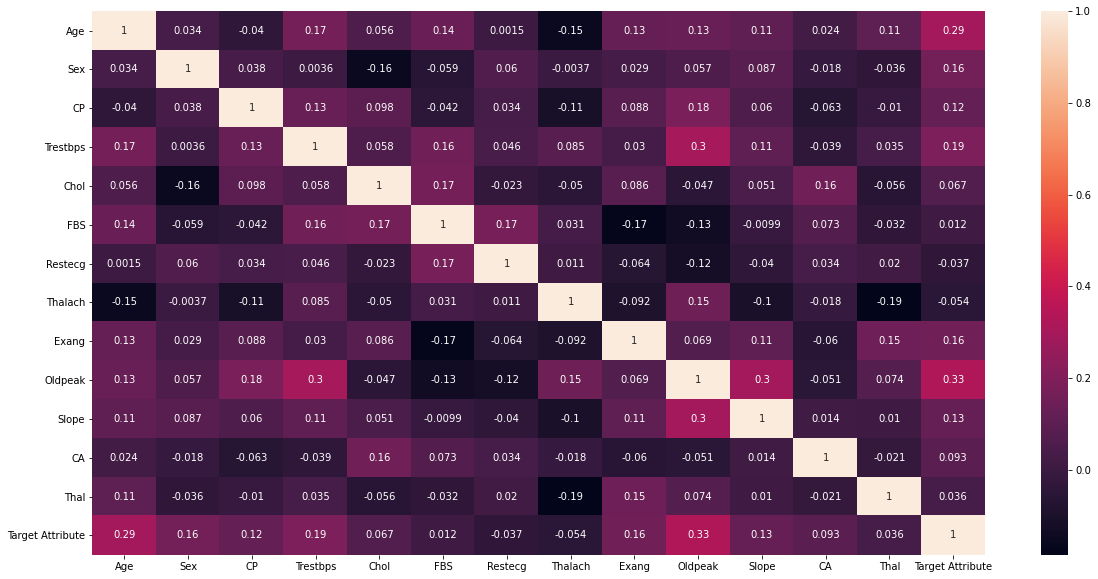

In [246]:
plt.figure(figsize=(20,10))
sns.heatmap(dscorr,annot=True)

Observations:
    
    1) All the columns have some correlation with Target Attribute.
    2) Old Peak has highest correlation with Target followed by age and Thalach has the least correlation.

In [247]:
ds.head()

,Age,Sex,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Target Attribute
0,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,2.0,1.0,7.0,1.0
1,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,1.0,7.0,2.0
2,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,1.0,7.0,1.0
3,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,1.0,7.0,1.0
4,66.0,1.0,3.0,120.0,172.0,0.0,1.0,120.0,0.0,-0.5,1.0,1.0,7.0,1.0


# UNIVARIATE ANALYSIS

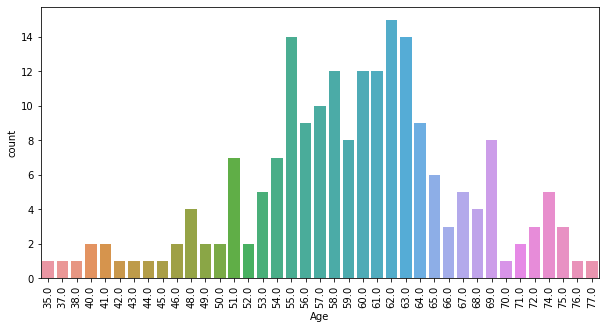

In [255]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(ds['Age'])
plt.show()

Observations:
Most of the people are in between age group 52 to 64 years.

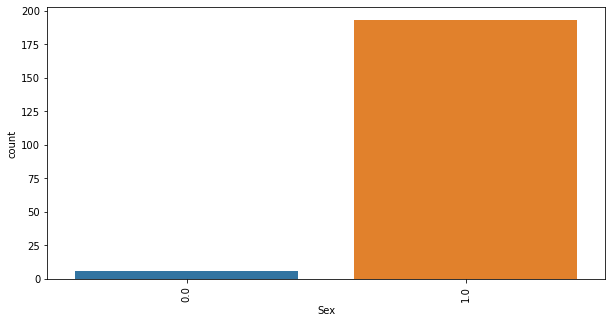

In [256]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(ds['Sex'])
plt.show()

Observations:
    
    1) 0 - Female & 1 - Male
    2) Instance of males are more than Females. Males- ~180 & Females - ~ 10

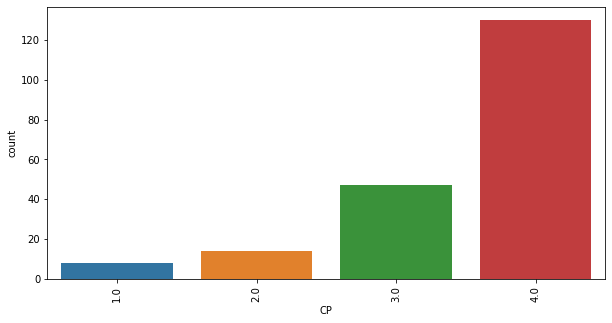

In [258]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(ds['CP'])
plt.show()

Observations: 
    
    1)
    
    1 Typical Angina   - ~ 10
    2 Atypical Angina  - ~20
    3 Non Anginal Pain - ~ 50
    4 Asymptomatic     - ~130
 
    2) Asymptomatic Patients are more

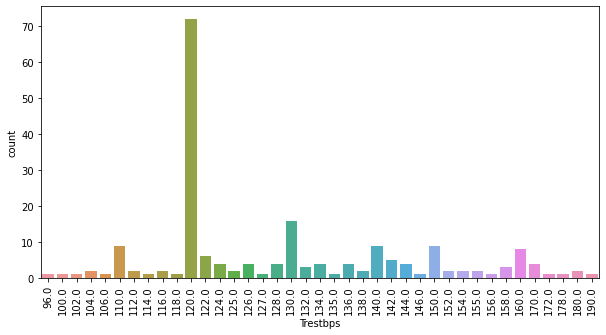

In [260]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(ds['Trestbps'])
plt.show()

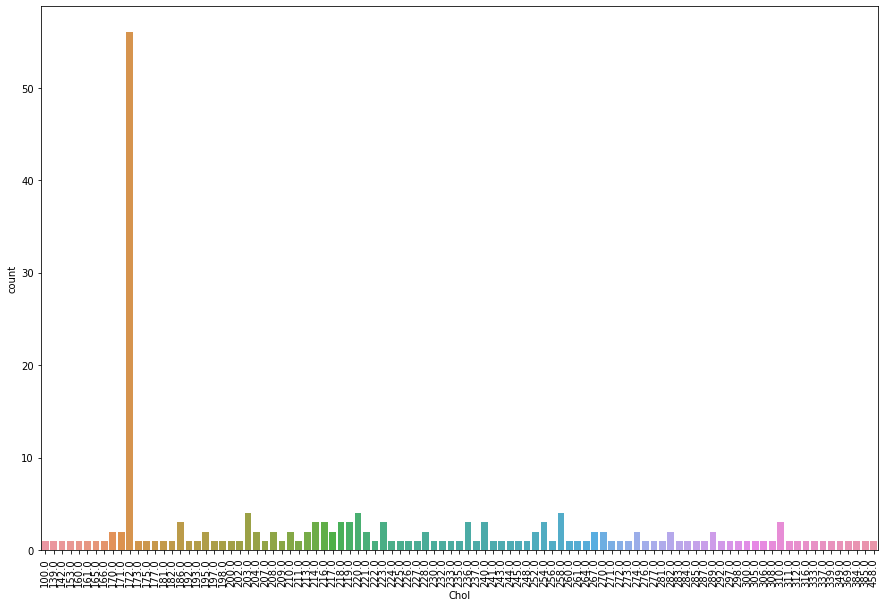

In [262]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(ds['Chol'])
plt.show()

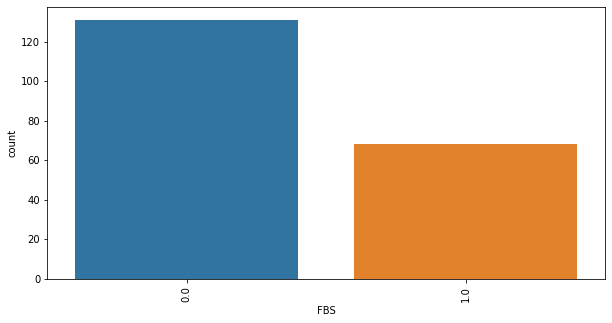

In [263]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(ds['FBS'])
plt.show()

# 1- True & 0- False

1) Approx 70 patients have Blood Sugar
2) Approx 130 patient doesn't have Blood Sugar

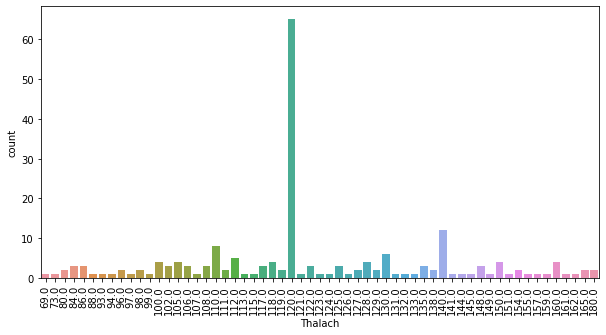

In [265]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(ds['Thalach'])
plt.show()

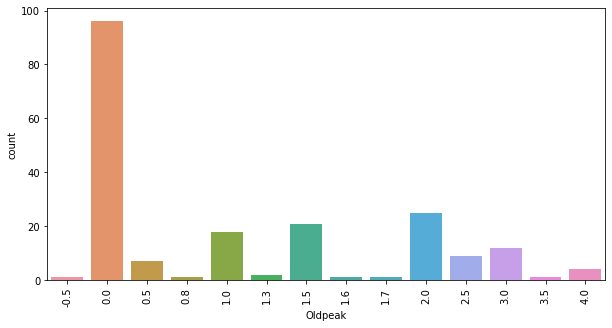

In [266]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(ds['Oldpeak'])
plt.show()

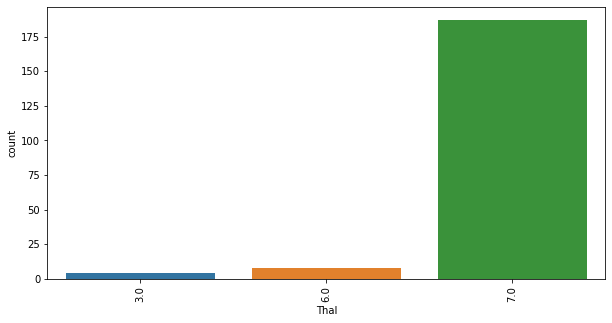

In [267]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(ds['Thal'])
plt.show()

3 = Normal  6 = Fixed Defect; 7 = Reversable Defect

Reversible Defect has the hisgest no of occurance of approx 180

# BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Target Attribute', ylabel='Age'>

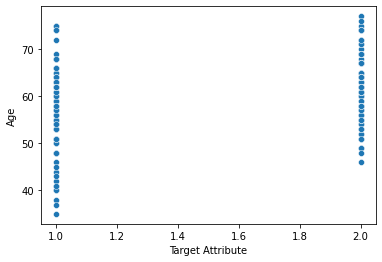

In [268]:
sns.scatterplot(x='Target Attribute',y='Age',data=ds)

<AxesSubplot:xlabel='Target Attribute', ylabel='Sex'>

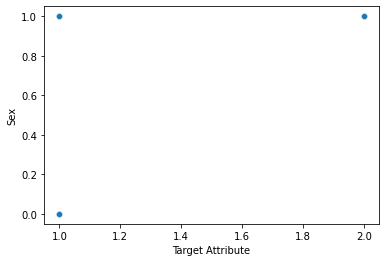

In [269]:
sns.scatterplot(x='Target Attribute',y='Sex',data=ds)

<AxesSubplot:xlabel='Target Attribute', ylabel='CP'>

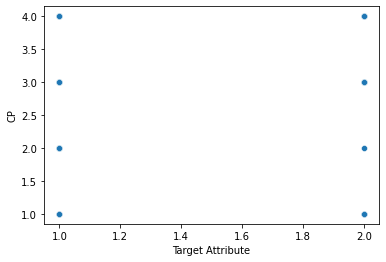

In [270]:
sns.scatterplot(x='Target Attribute',y='CP',data=ds)

<AxesSubplot:xlabel='Target Attribute', ylabel='Trestbps'>

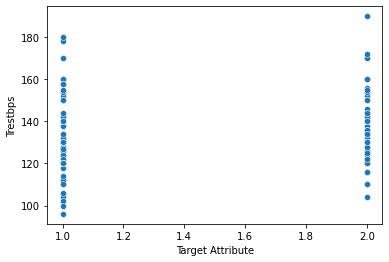

In [271]:
sns.scatterplot(x='Target Attribute',y='Trestbps',data=ds)

<AxesSubplot:xlabel='Target Attribute', ylabel='Chol'>

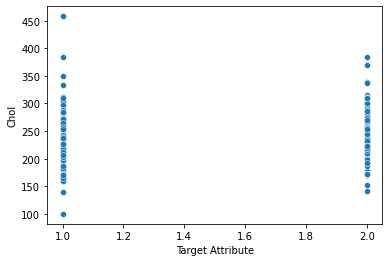

In [272]:
sns.scatterplot(x='Target Attribute',y='Chol',data=ds)

<AxesSubplot:xlabel='Target Attribute', ylabel='Thalach'>

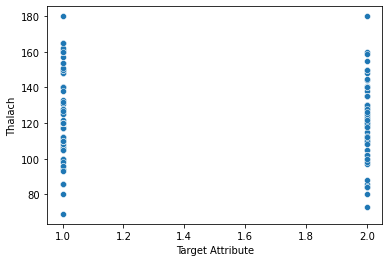

In [273]:
sns.scatterplot(x='Target Attribute',y='Thalach',data=ds)

# Distribution Plot

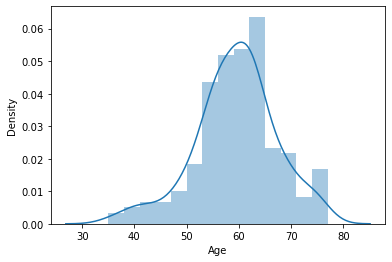

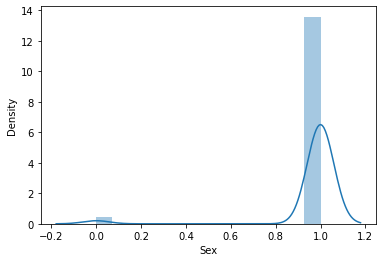

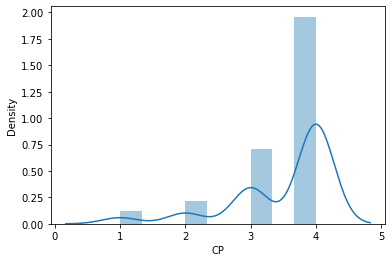

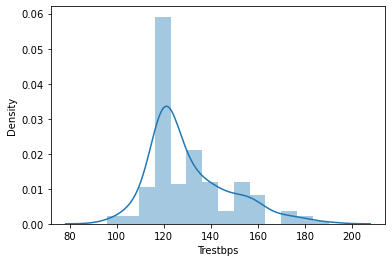

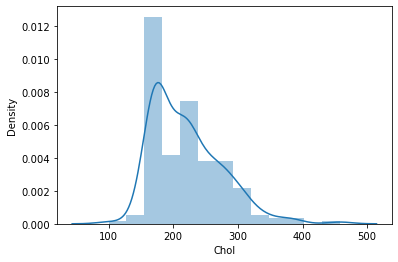

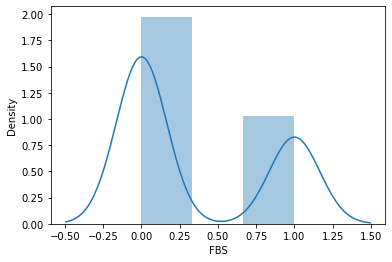

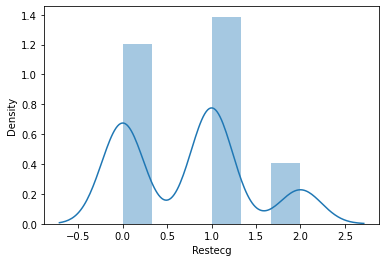

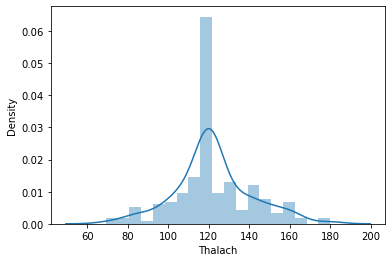

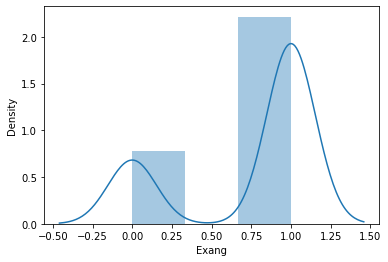

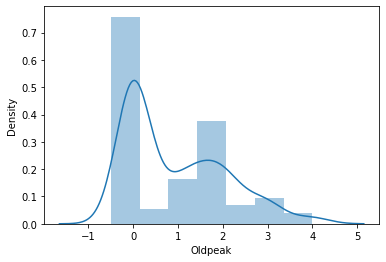

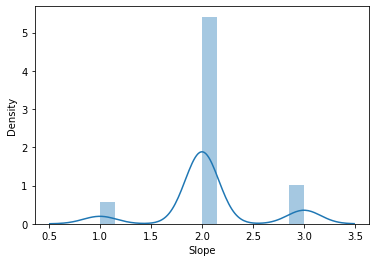

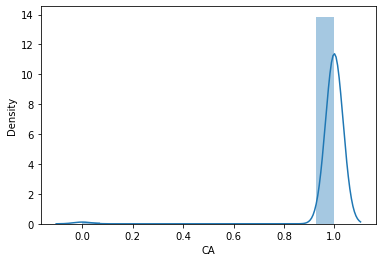

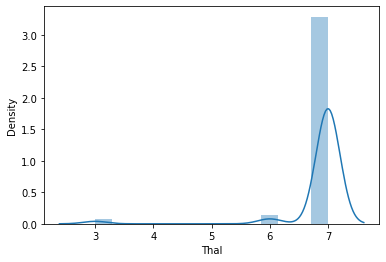

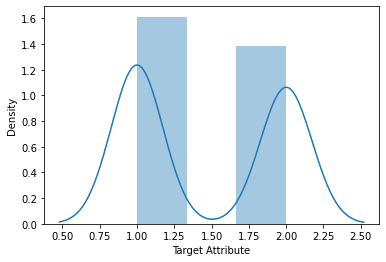

In [274]:
for i in ds.columns:
    sns.distplot(ds[i])
    plt.show()

# Checking Outliers

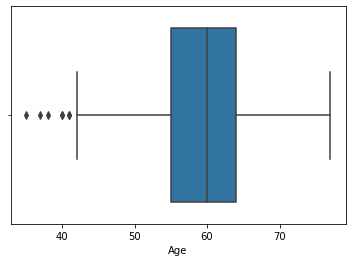

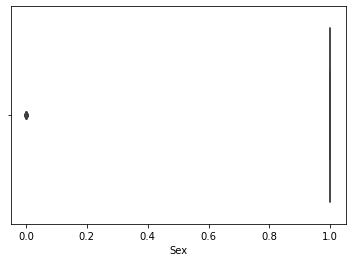

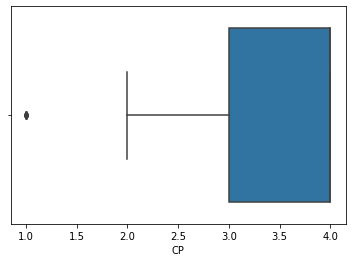

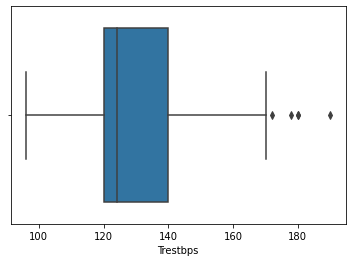

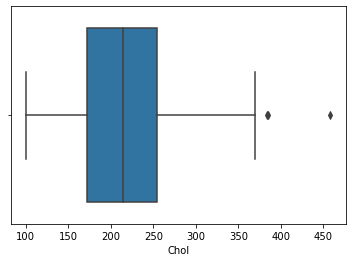

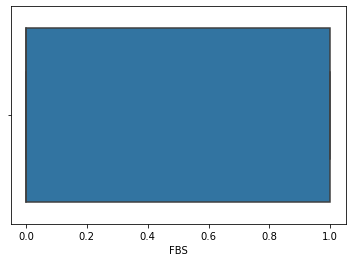

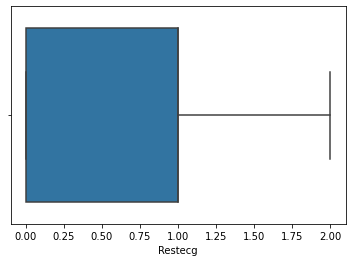

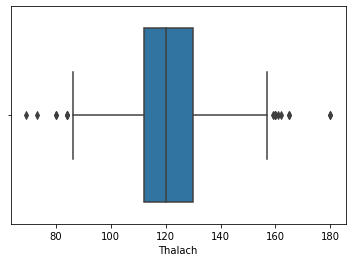

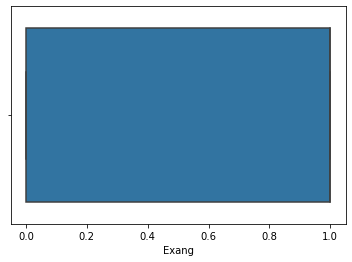

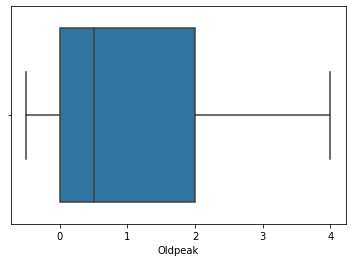

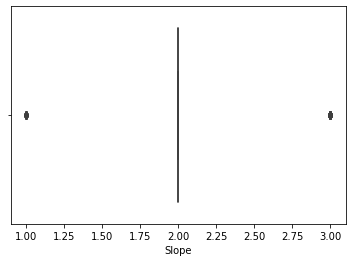

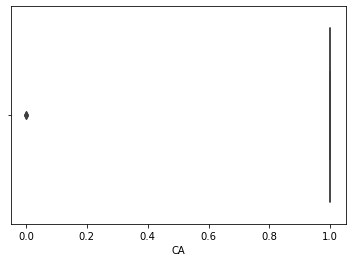

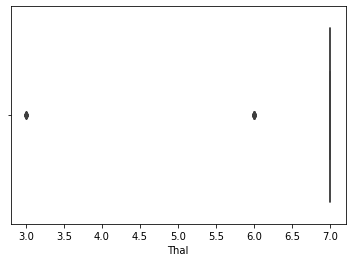

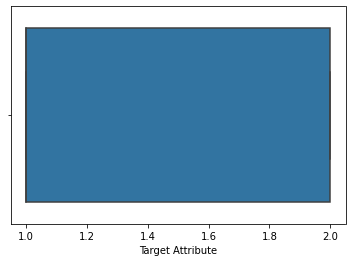

In [275]:
#Loop for checking outliers
for i in ds.columns:
    sns.boxplot((ds[i]))
    plt.show()

Observations:
    
Age,Sex,CP,Trestbps,Chol,Thalach,Slope,CA, Thal have outlers.

# Label Encoding of Columns

In [156]:
from sklearn.preprocessing import LabelEncoder

In [157]:
le = LabelEncoder()

i = ds[['Age','Trestbps','Chol','Thalach']]

for i in i:
    ds[i] = le.fit_transform(ds[i])    

In [158]:
from scipy.stats import zscore

In [159]:
z=np.abs(zscore(ds))
z

array([[1.91451169, 0.17631813, 0.62583065, ..., 0.10075854, 0.2046578 ,
        0.92726107],
       [0.08437512, 0.17631813, 0.62583065, ..., 0.10075854, 0.2046578 ,
        1.07844494],
       [0.58192048, 0.17631813, 0.62583065, ..., 0.10075854, 0.2046578 ,
        0.92726107],
       ...,
       [0.58192048, 0.17631813, 0.62583065, ..., 0.10075854, 1.49229649,
        1.07844494],
       [0.18214312, 0.17631813, 0.62583065, ..., 0.10075854, 0.2046578 ,
        0.92726107],
       [0.35089336, 0.17631813, 1.89013499, ..., 0.10075854, 0.2046578 ,
        0.92726107]])

In [160]:
threshold=3
print(np.where(z>3))

(array([ 11,  27,  38,  50,  65,  71,  75,  78,  96, 125, 127, 130, 132,
       136, 170, 188, 189, 193, 194, 195], dtype=int64), array([12, 11, 11,  1,  2,  2,  2,  1,  2,  1,  1,  2,  2,  2, 12, 12,  1,
       12,  1,  2], dtype=int64))


In [161]:
ds_new=ds[(z<3).all(axis=1)]
ds_new

,Age,Sex,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Target Attribute
0,7,1.0,4.0,17,28,0.0,1.0,33,0.0,0.0,2.0,1.0,7.0,1.0
1,22,1.0,4.0,18,35,0.0,1.0,42,1.0,1.5,3.0,1.0,7.0,2.0
2,17,1.0,4.0,24,45,0.0,1.0,47,1.0,2.5,1.0,1.0,7.0,1.0
3,28,1.0,3.0,5,31,1.0,2.0,11,1.0,1.3,2.0,1.0,7.0,1.0
4,28,1.0,3.0,10,10,0.0,1.0,26,0.0,-0.5,1.0,1.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,15,1.0,4.0,25,83,1.0,1.0,34,1.0,1.5,2.0,1.0,7.0,2.0
192,24,1.0,4.0,32,8,0.0,1.0,41,1.0,0.0,2.0,1.0,7.0,1.0
196,17,1.0,4.0,11,40,1.0,1.0,12,0.0,0.0,2.0,1.0,6.0,2.0
197,20,1.0,4.0,10,97,1.0,2.0,26,1.0,0.0,2.0,1.0,7.0,1.0


# Importing Libraries for Making Models

In [162]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [276]:
ds.skew()

Age                -0.397178
Sex                -5.537073
CP                 -1.641267
Trestbps            1.043562
Chol                1.085254
FBS                 0.672579
Restecg             0.396540
Thalach             0.258275
Exang              -1.094854
Oldpeak             0.838673
Slope               0.207950
CA                 -9.898728
Thal               -5.904837
Target Attribute    0.152335
dtype: float64

Considering normal skewness = +/- 0.50

Approx all columns are skewed

In [278]:
x=ds_new.iloc[:,0:12]

In [279]:
y=ds_new.iloc[:,-1]

In [280]:
from sklearn.preprocessing import power_transform

In [282]:
#removing skewness
x= power_transform(x,method='yeo-johnson')

In [283]:
sc=StandardScaler()

x=sc.fit_transform(x)

In [284]:
x=pd.DataFrame(x)

In [285]:
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.849047,0.0,0.683412,0.268887,0.028871,-0.710072,0.461538,0.455169,-1.725624,-0.951279,-0.121498,0.0
1,0.046675,0.0,0.683412,0.371471,0.293924,-0.710072,0.461538,1.094238,0.579501,0.828586,1.820513,0.0
2,-0.624725,0.0,0.683412,0.913836,0.604457,-0.710072,0.461538,1.437646,0.579501,1.242323,-2.452086,0.0
3,0.895635,0.0,-1.445719,-1.540155,0.148497,1.408309,1.642596,-1.289480,0.579501,0.711828,-0.121498,0.0
4,0.895635,0.0,-1.445719,-0.608654,-1.063887,-0.710072,0.461538,-0.065048,-1.725624,-2.962791,-2.452086,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
174,-0.883271,0.0,0.683412,0.994526,1.411911,1.408309,0.461538,0.527684,0.579501,0.828586,-0.121498,0.0
175,0.324823,0.0,0.683412,1.503770,-1.273376,-0.710072,0.461538,1.024634,0.579501,-0.951279,-0.121498,0.0
176,-0.624725,0.0,0.683412,-0.461261,0.457364,1.408309,0.461538,-1.200796,-1.725624,-0.951279,-0.121498,0.0
177,-0.226067,0.0,0.683412,-0.608654,1.628810,1.408309,1.642596,-0.065048,0.579501,-0.951279,-0.121498,0.0


In [286]:
# Loop for checking Best Random_State and Model

model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),
       AdaBoostClassifier(),GradientBoostingClassifier()]

max_accuscore=0
for rand in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=rand)
    for i in model:
        i.fit(x_train,y_train)
        y_pred=i.predict(x_test)
        accu_sco=accuracy_score(y_test,y_pred)
        if accu_sco > max_accuscore:
            max_accuscore = accu_sco
            final_state = rand
            final_model= i
        

print('max accu_score with random_state',final_state,'is',max_accuscore,'and model is',final_model)

max accu_score with random_state 123 is 0.8333333333333334 and model is RandomForestClassifier()


In [287]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=123)

In [288]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8055555555555556
[[17  4]
 [ 3 12]]
              precision    recall  f1-score   support

         1.0       0.85      0.81      0.83        21
         2.0       0.75      0.80      0.77        15

    accuracy                           0.81        36
   macro avg       0.80      0.80      0.80        36
weighted avg       0.81      0.81      0.81        36



# Cross Validation Score

In [174]:
from sklearn.model_selection import cross_val_score

In [177]:
rfc = RandomForestClassifier()

sc=cross_val_score(rf,x,y,cv=50)
print('Cross Validation Score is = ',sc*100)
print('Mean is =',sc.mean()*100,'and Standard Deviation is =',sc.std())

Cross Validation Score is =  [ 75.         100.          25.          75.          50.
  75.          25.          50.          50.          50.
  75.         100.          50.          75.          75.
  50.          25.         100.          75.          50.
 100.          75.          75.          75.          25.
  75.          75.          75.          50.         100.
  66.66666667  66.66666667 100.          33.33333333  66.66666667
  66.66666667  33.33333333  66.66666667  66.66666667  66.66666667
 100.         100.         100.          66.66666667 100.
 100.           0.          66.66666667  33.33333333  66.66666667]
Mean is = 66.83333333333334 and Standard Deviation is = 0.2452266525300851


# Exporting Model

In [178]:
import joblib

In [179]:
joblib.dump(rf,'Heart-Disease.pkl')

['Heart-Disease.pkl']